<a href="https://colab.research.google.com/github/dubeyshubham786/Cement-Strength-Prediction/blob/main/Cement_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cement Strength Prediction**

In [2]:
# importing the python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/PROJECTS/Resume Project/Cement Strength Prediction/Concrete Compressive Strength.csv")

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
df.shape

(1030, 9)

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

So we don't have any missing values in our dataset.

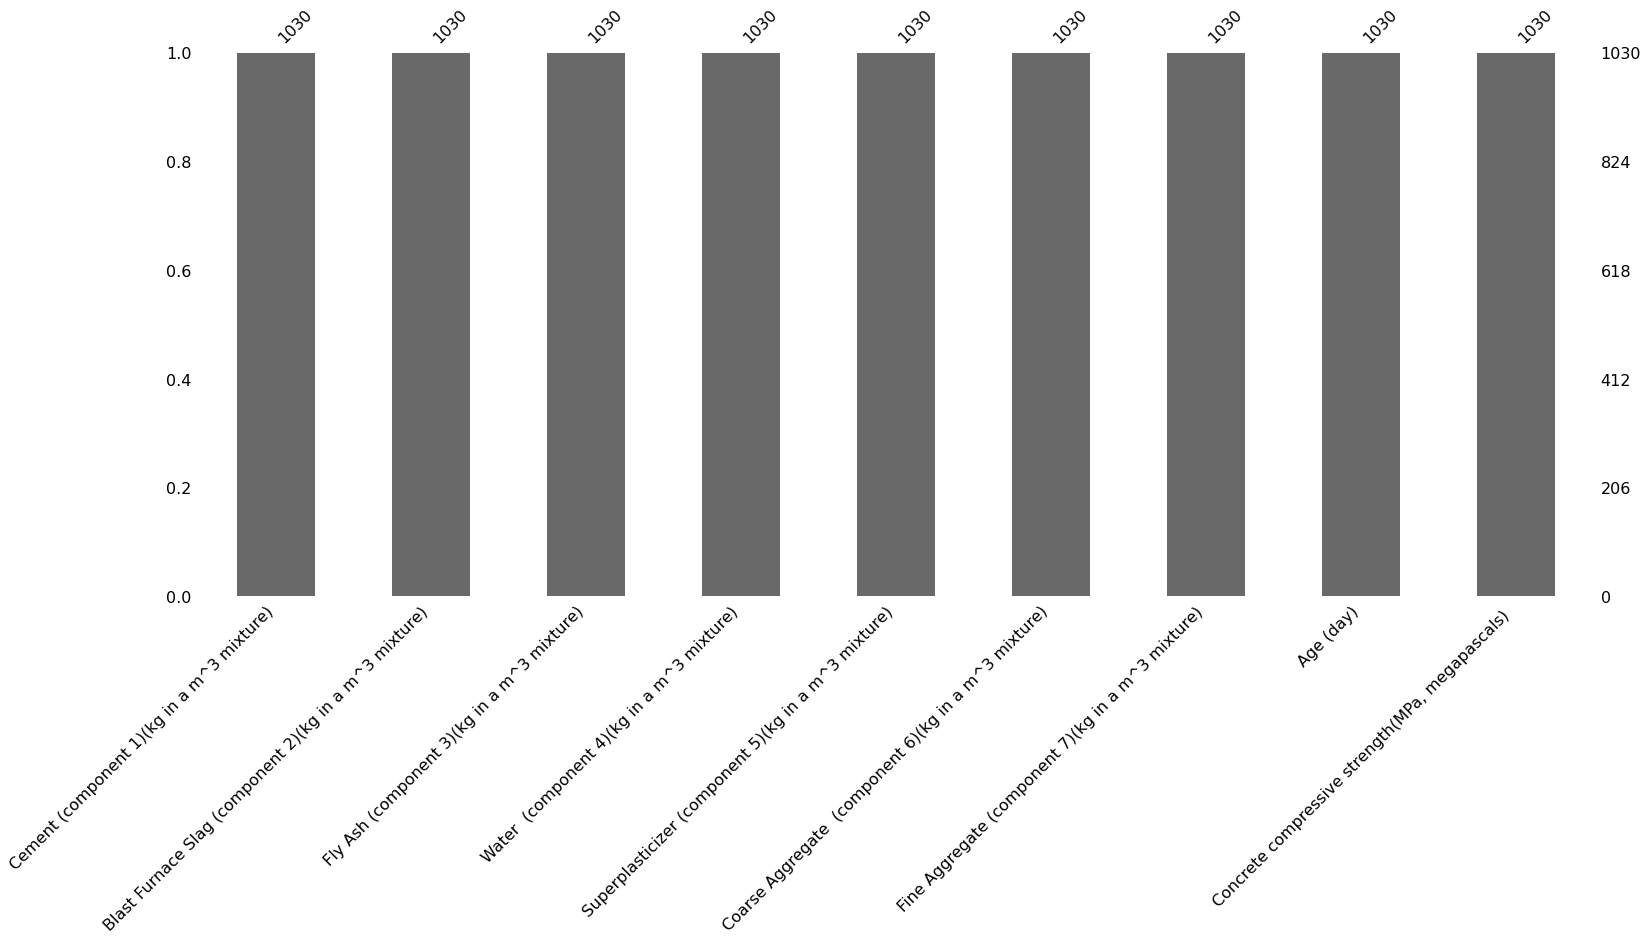

In [10]:
# visualizing missing values

msno.bar(df)
plt.show()

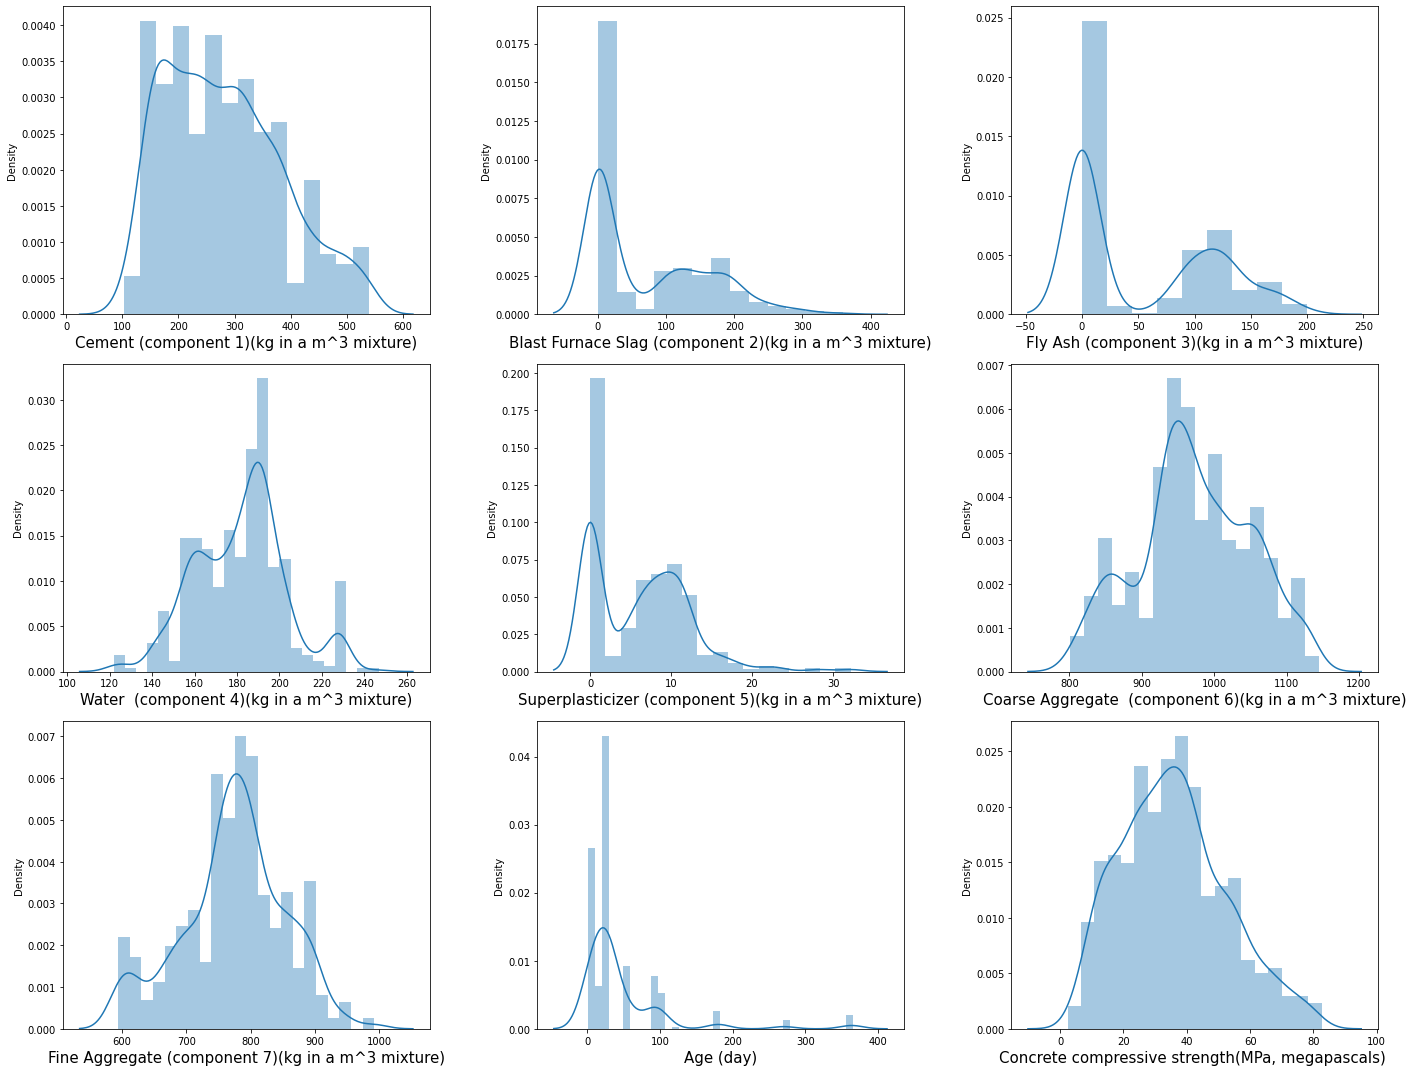

In [11]:
# Now plotting the distplot to see whether it is normalized or not.

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [12]:
# creating feature and label

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
X.var()

Cement (component 1)(kg in a m^3 mixture)                10921.742654
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     7444.083725
Fly Ash (component 3)(kg in a m^3 mixture)                4095.548093
Water  (component 4)(kg in a m^3 mixture)                  456.060245
Superplasticizer (component 5)(kg in a m^3 mixture)         35.682602
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      6045.656228
Fine Aggregate (component 7)(kg in a m^3 mixture)         6428.099159
Age (day)                                                 3990.437729
dtype: float64

In [14]:
# normalizing features
# let's add 1 to each value in everycolumn so that we don't get exception while calculating the log value of 0

for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [15]:
X.var()

Cement (component 1)(kg in a m^3 mixture)                0.143939
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    5.816392
Fly Ash (component 3)(kg in a m^3 mixture)               5.641045
Water  (component 4)(kg in a m^3 mixture)                0.014066
Superplasticizer (component 5)(kg in a m^3 mixture)      1.333888
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.006475
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.011292
Age (day)                                                1.233057
dtype: float64

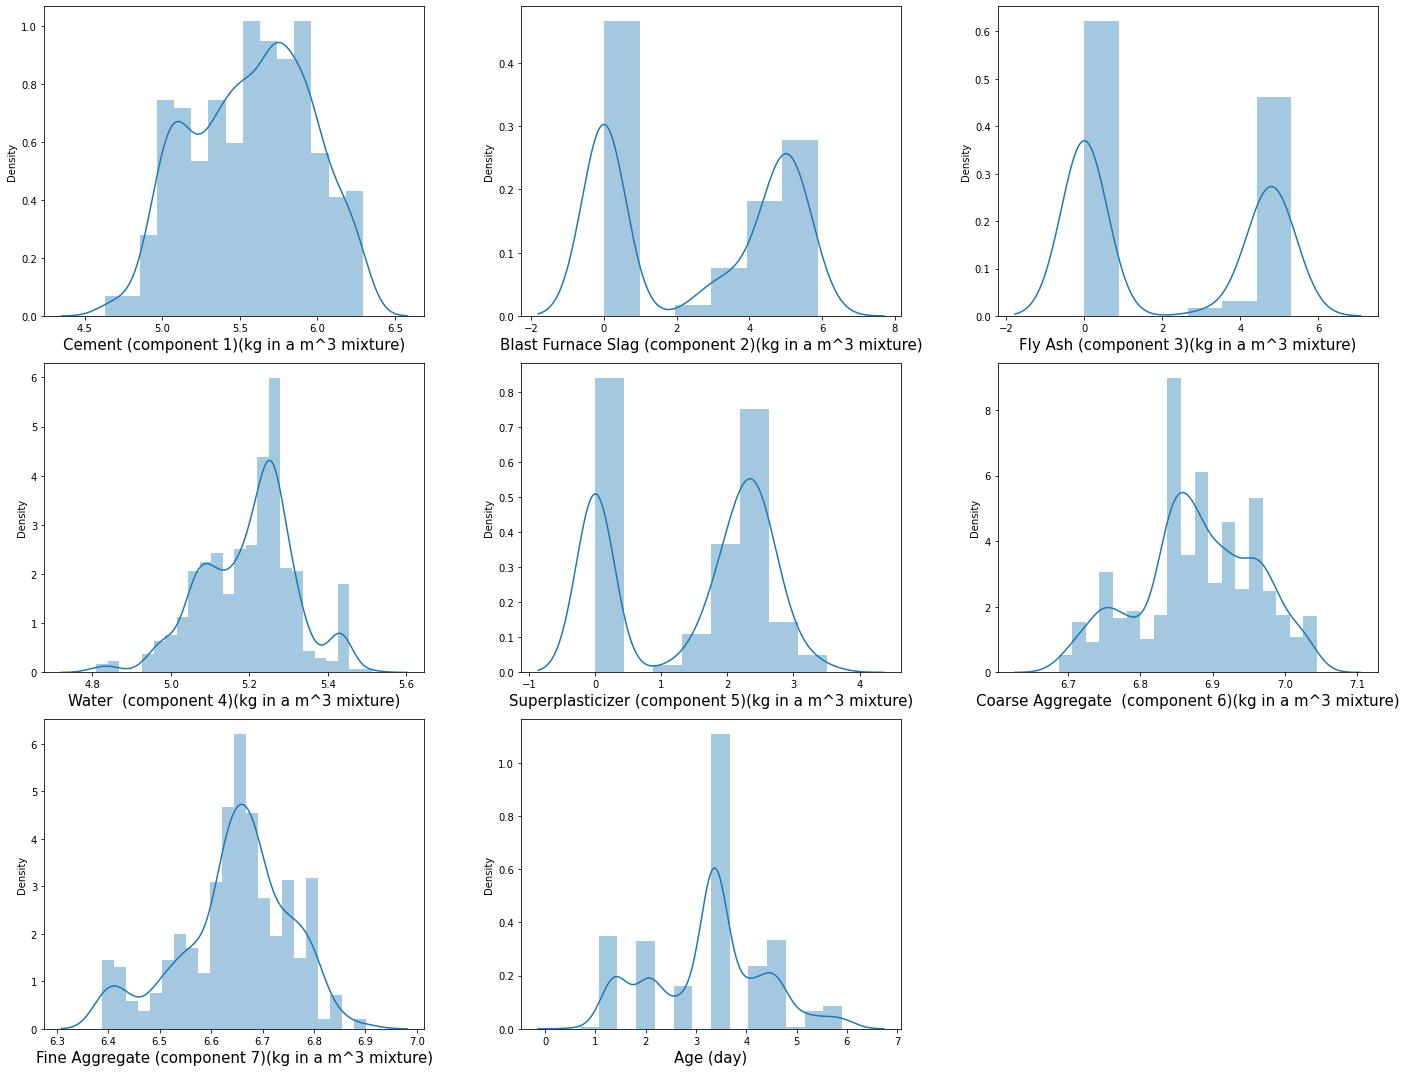

In [16]:
# Now again plotting the distplot

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

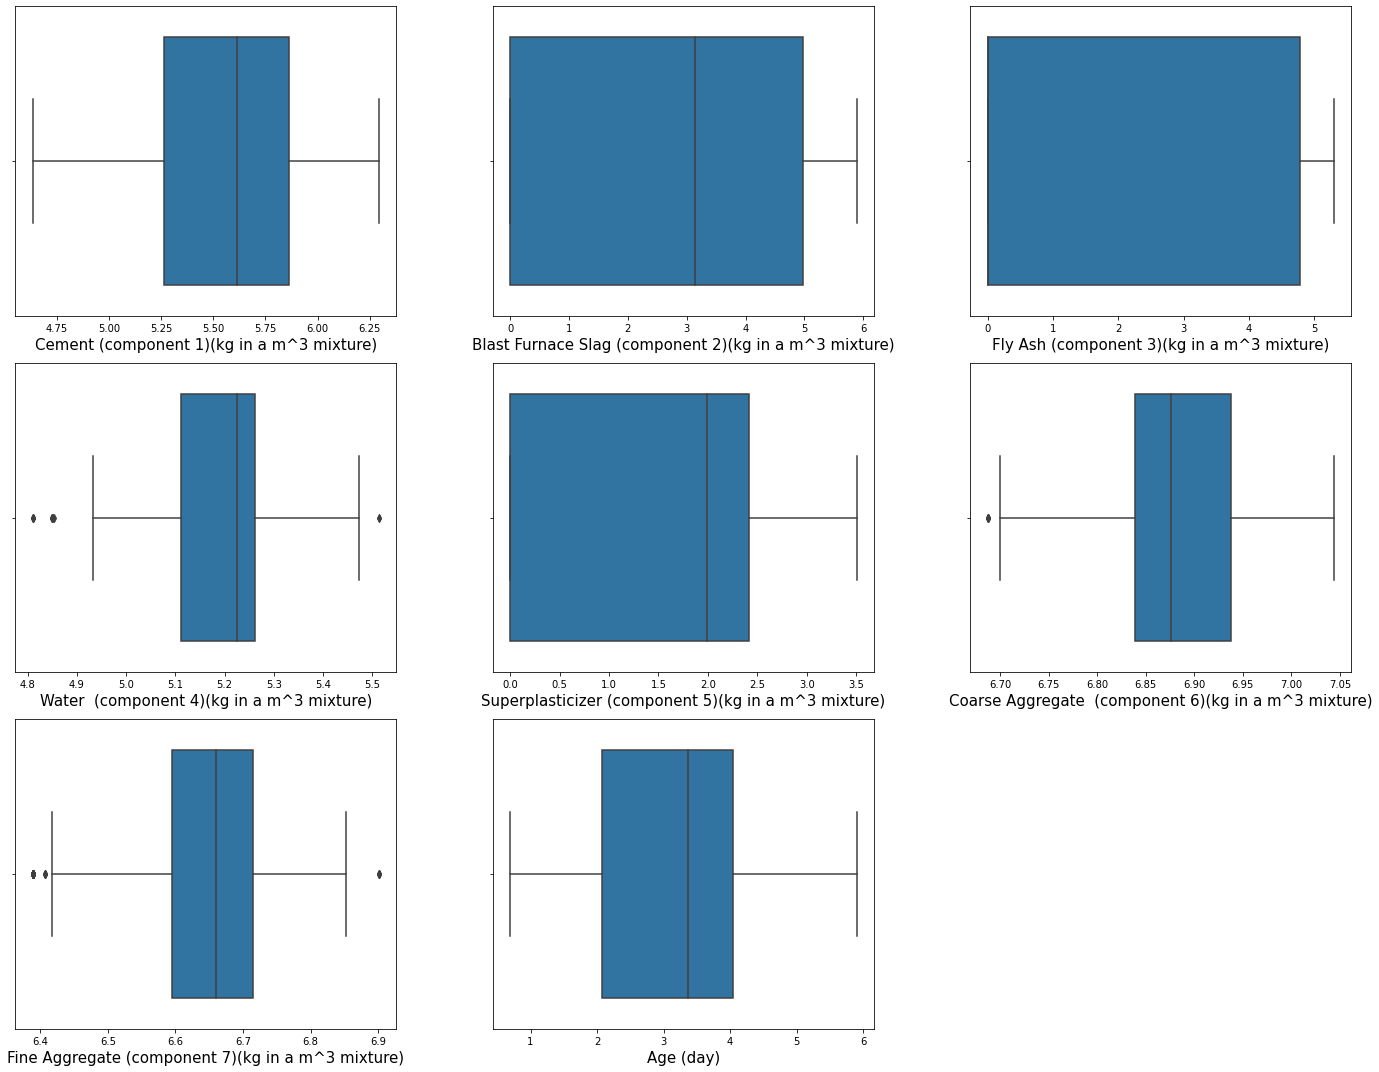

In [17]:
# Now the data is been normalized
# Now to check for outlier we have to draw boxplot.

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
  if plotnumber <= 8:
    ax = plt.subplot(3, 3, plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col, fontsize = 15)

  plotnumber += 1

plt.tight_layout()
plt.show()

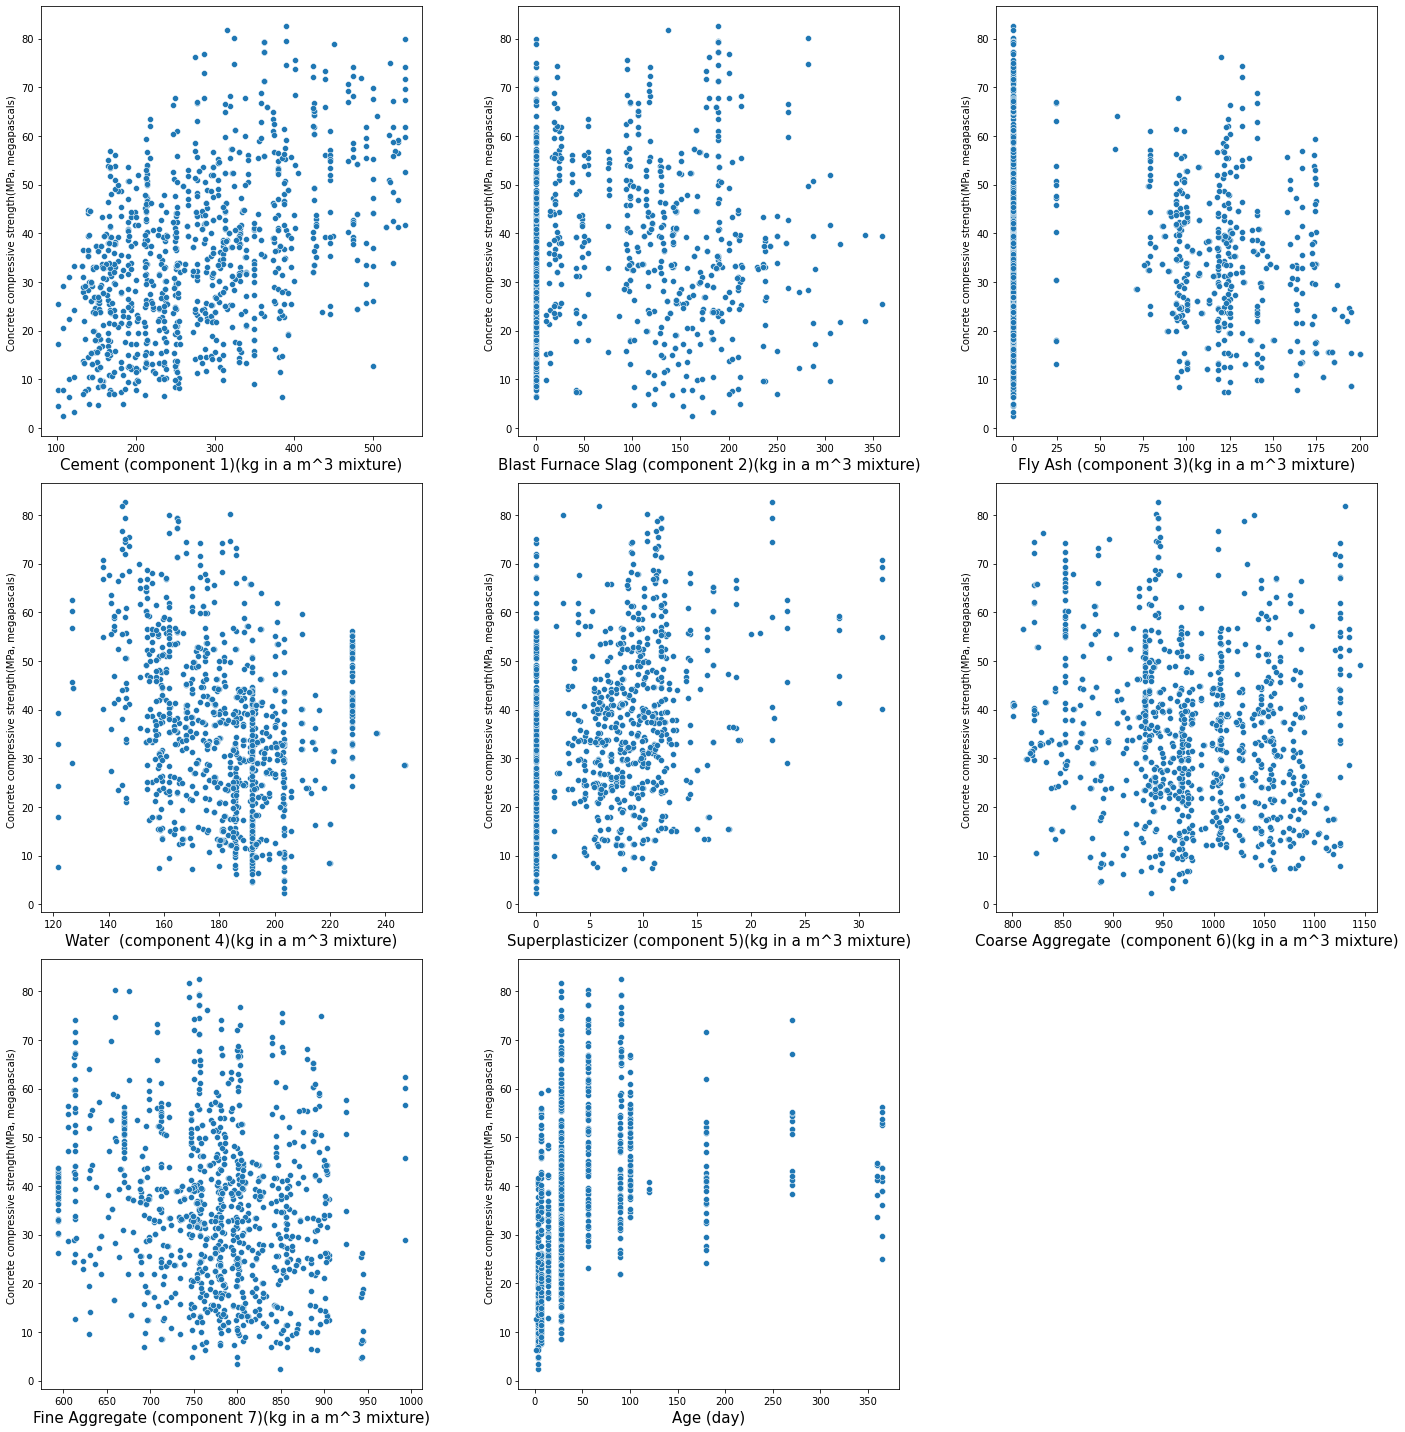

In [18]:
# let's check how our features are related to the target column

plt.figure(figsize = (20, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(df[col], y)
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

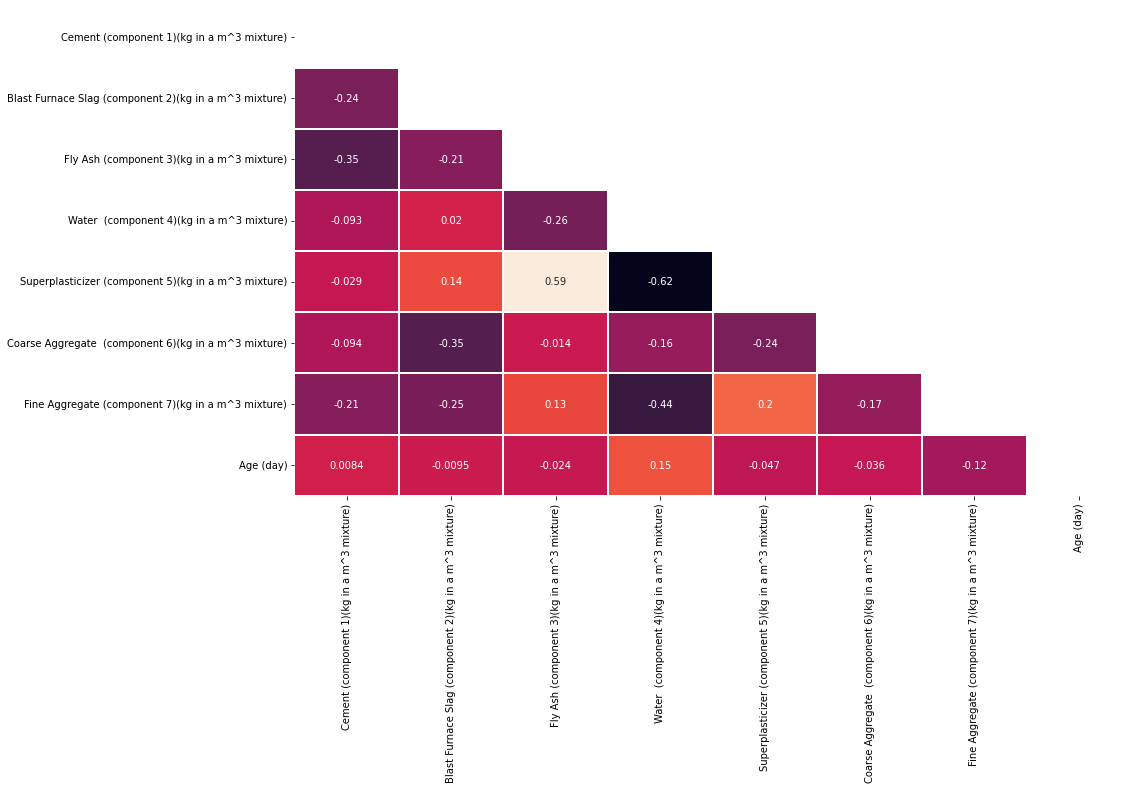

In [19]:
# checking for correlation using heatmap

plt.figure(figsize = (15, 9))

corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1, cbar = False)
plt.show()

We can see that none of the values are correlated.

In [20]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [21]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# **Linear Regression**

In [22]:
# importing linear regression 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
lr.score(X_train, y_train)

0.8000041271093483

In [24]:
lr.score(X_test, y_test)


0.8063765786014485

### **Accuracy is 80.6% with the help of Linear Regression.**

## **Decision Tree Regressor**



In [25]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
dtr.score(X_train, y_train)

0.9973575889958858

In [27]:
dtr.score(X_test, y_test)

0.8463893326207301

In [28]:
# Hyper Parameter Tuning Decision Tree Regressor

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dtr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [29]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.8288548653810507


In [30]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, splitter='random')

In [31]:
dtr.score(X_train, y_train)

0.9611759685262303

In [32]:
dtr.score(X_test, y_test)

0.7996850962460776

## **Random Forest Regression**

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
rfr.score(X_train, y_train)

0.9850179893943327

In [35]:
rfr.score(X_test, y_test)

0.9084890544064301

## **XgBoost Regressor**

In [36]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

[07:54:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_estimators=200)

In [37]:
xgb.score(X_train, y_train)

0.9968725014645435

In [38]:
xgb.score(X_test, y_test)

0.9188344832567374